In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load and handle the missing data
titanic = sns.load_dataset("titanic")

features = ["pclass", "sex", "fare", "embarked", "age"]
target = ["survived"]

# handle missing data
imp_median = SimpleImputer(strategy="median")
titanic[["age"]] = imp_median.fit_transform(titanic[["age"]])

imp_freq = SimpleImputer(strategy="most_frequent")
titanic[["embarked"]] = imp_freq.fit_transform(titanic[["embarked"]])

# encode
le = LabelEncoder()

titanic["sex"] = le.fit_transform(titanic["sex"])
titanic["embarked"] = le.fit_transform(titanic["embarked"])

X = titanic[features]
y = titanic[target]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=42
)

In [3]:
# Decision Tree
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

print("Training accuracy: ", accuracy_score(y_train, y_pred_train)*100, "%")
print("Testing accuracy: ", accuracy_score(y_test, y_pred_test)*100, "%")
# classic case of overfitting

Training accuracy:  97.91332263242376 %
Testing accuracy:  76.49253731343283 %


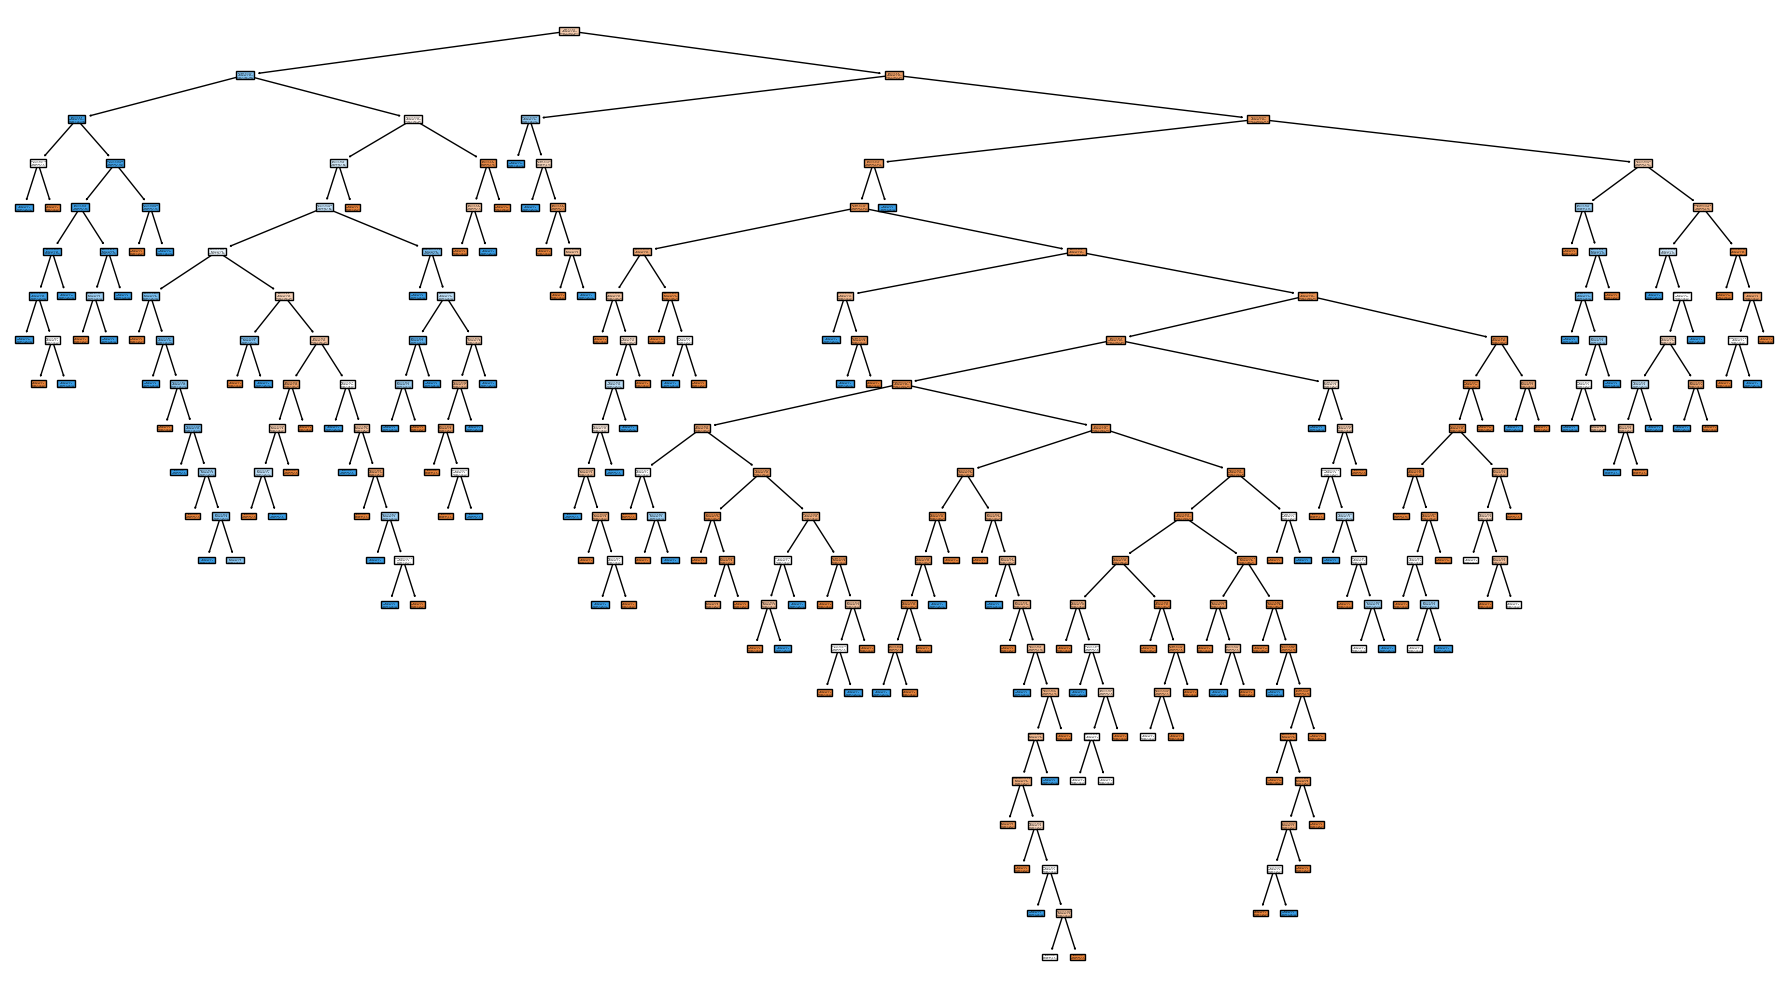

In [4]:
from sklearn.tree import plot_tree

plt.figure(figsize=(18, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True
)

plt.tight_layout()